In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("coursea_data.csv", index_col=0)
def convert_enrolled(val):
    if isinstance(val, str) and "k" in val.lower():
        return float(val.lower().strip().replace("k", "")) * 1000
    elif isinstance(val, str) and "m" in val.lower():
        return float(val.lower().strip().replace("m", "")) * 1000000
    else:
        return float(val)

df.course_students_enrolled = df.course_students_enrolled.apply(convert_enrolled)

df.index = df.index.sort_values()

# Data visualization
***
## Overview
This data set contains 891 rows with 6 features.  
With 4 categorical features:
1. Course title
2. Course organization
3. Course certification type
4. Course difficulty
    
And 2 numeric features:
1. Course rating
2. Course students enrolled

In [57]:
print("Total data rows:", df.index.value_counts().sum())
df.head()

Total data rows: 891


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0


### Duplicates and null values
- There's one organization providing one course with same title but certification and course difficulty are diferent. Also there's students enrolled diference.
- This data set has no empty values.

In [58]:
df[df[["course_title", "course_organization"]].duplicated(keep=False)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
224,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41000.0
225,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54000.0


### Null values

In [59]:
df.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

***
## Rating and students enrolled outliers

### A total of 154 organizations, offering 888 diferent courses
- 17 courses falls to low outliers by rating, mean of 4.05 out of 5 with worst rated 3.3.
- 78 courses with high outliers by students enrolled, mean of close to 460,000 with most popular at 3,200,000 students enrolled.
- None of these outliers intertwines

In [60]:
print("Total unique courses:", df.course_title.str.strip().nunique())
print("Total unique oragnizations:", df.course_organization.str.strip().nunique())

Total unique courses: 888
Total unique oragnizations: 154


In [73]:
df.course_rating.idxmin()
df.iloc[413]

course_title                How To Create a Website in a Weekend! (Project...
course_organization                          The State University of New York
course_Certificate_type                                                COURSE
course_rating                                                             3.3
course_difficulty                                                       Mixed
course_students_enrolled                                             140000.0
Name: 413, dtype: object

In [6]:
num_csv = df.select_dtypes(include=[float, int])
descr = num_csv.describe()
q1 = descr.loc["25%"]
q3 = descr.loc["75%"]
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outl_low = num_csv[(num_csv < lower)]
outl_high = num_csv[(num_csv > upper)]
outl_low.notna().sum()
outl_high.notna().sum()

low = outl_low[outl_low.notna()]
print("Total low outliers - course rating only:", low.course_rating.dropna(how = "all").value_counts().sum())
print("Min score:", low.course_rating.min())
print(low.mean().round(2))
print("\n")
high = outl_high[outl_high.notna()]
print("Total high outliers - course students enrolled only:", high.course_students_enrolled.dropna(how = "all").value_counts().sum())
print("Max students enrolled:", high.course_students_enrolled.max())
print(high.mean().round())

Total low outliers - course rating only: 17
Min score: 3.3
course_rating               4.05
course_students_enrolled     NaN
dtype: float64


Total high outliers - course students enrolled only: 78
Max students enrolled: 3200000.0
course_rating                    NaN
course_students_enrolled    459615.0
dtype: float64


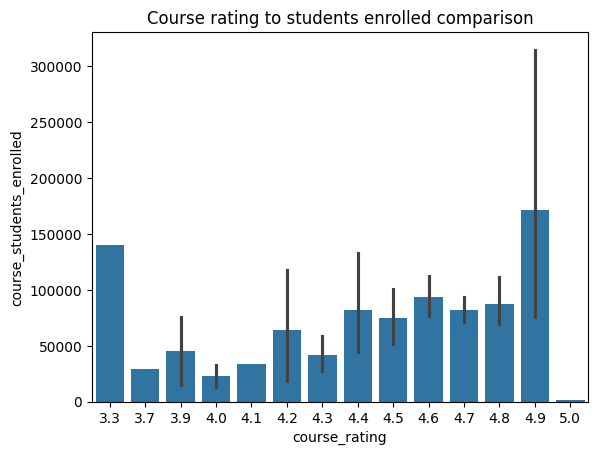

In [80]:

sns.barplot(x=df.course_rating, y=df.course_students_enrolled)

# Adjust layout
#plt.tight_layout()
plt.title("Course rating to students enrolled comparison")
plt.show()

***
## Popularity breakdown

***

## TLDR

***
With more data features there would be more accurate analysis